In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
df = pd.read_csv('spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
# Verify for missing values
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
# Verify the number for each class
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Balancing the Data

In [12]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']
# Select Randomly 747 ham messages
ham = ham.sample(spam.shape[0])
print(ham.shape)
print(spam.shape)
# Combine each class
data = ham.append(spam, ignore_index=True)
data.tail()

(747, 4)
(747, 4)


,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


## Exploratory Data Analysis

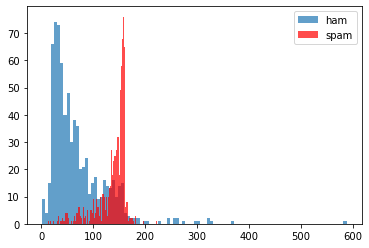

In [18]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7, label='ham')
plt.hist(data[data['label']=='spam']['length'],color='red', bins = 100, alpha = 0.7, label='spam')
plt.legend()
plt.show()

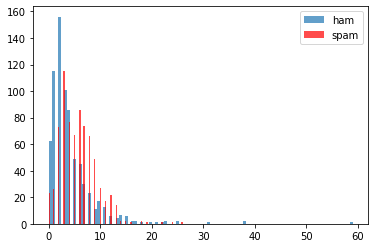

In [19]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7, label='ham')
plt.hist(data[data['label']=='spam']['punct'],color='red', bins = 100, alpha = 0.7, label='spam')
plt.legend()
plt.show()

## Data Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Split the data
x_train, x_test, y_train ,y_test = train_test_split(data['message'], data['label'], test_size=0.2,random_state=0, shuffle = True, stratify=data['label'])

In [29]:
x_train.shape, x_test.shape

((1195,), (299,))

###  Bag of Words Creation

In [30]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)

## Random Forest

### Pipeline and RF

In [31]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [34]:
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [35]:
y_pred = clf.predict(x_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[149,   1],
       [ 14, 135]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [38]:
accuracy_score(y_test, y_pred)

0.9498327759197325

### Predict a Real Message


In [39]:
clf.predict(['Hi, My name is Juan David'])

array(['ham'], dtype=object)

In [44]:
clf.predict(['Congratulations! . You have won Free Tickets for traveling around the World'])

array(['spam'], dtype=object)

## SVM

### Pipeline SVM

In [55]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1000, gamma='auto'))])

In [56]:
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [57]:
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[149,   1],
       [ 13, 136]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.96       150
        spam       0.99      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299



In [59]:
accuracy_score(y_test, y_pred)

0.9531772575250836

In [60]:
clf.predict(['Hi, My name is Juan David'])

array(['ham'], dtype=object)

In [61]:
clf.predict(['Congratulations! . You have won Free Tickets for traveling around the World'])

array(['spam'], dtype=object)